## Introduction
Real-world data can be disorderly and unclean, making analyses difficult. In this project, I have collected tweet data and details for the twitter archive of the user @dog_rates, also known as WeRateDogs. WeRateDogs rates dogs with some humorous content about them. The ratings are out of 10, but these fun dogs all manage to score above 10. Since the twitter data consists primarily of tweets, additional data including favorite/retweet count data, and image predictions to identify dog breeds, were collected by querying Twitter's API and from alternate sources.

In [1]:
import pandas as pd
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import json

## Gathering

Sources: The data were collected from three sources. The basic tweet texts from 2015 to 2017, along with the information gleaned from it including the dog's name, stage and ratings were downloaded from the Udacity server as a csv file and saved as twitter-archive-enhanced.csv, and loaded into a dataframe using Pandas. Additional data were obtained by querying Twitter's API using the Tweepy library after creating a developer account, using the associated secure keys. The tweet_id indicated json files were downloaded and stored in a text file tweet_json.txt, and parsed to extract the favorite and retweet counts into a dataframe. Image_based breed predictions for the dogs, openly available from a url was downloaded as a tsv (image-predictions.tsv) and loaded into a third dtaframe. 

In [2]:
# Load the twitter archive downloaded from the Udacity server, into a dataframe
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Download the image-predictions file from the url below
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name = url.split('/')[-1]
if not os.path.exists(file_name):
    response = requests.get(url).content
    with open (file_name, mode = 'wb') as file: 
        file.write(response)
# Load the tsv file into a dataframe  
df_impreds = pd.read_csv('image-predictions.tsv', sep = '\t') 

In [4]:
# Connect to the Twitter API using the Tweepy library (after setting up a developer account in Twitter and recieving the consumer and access keys)
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [5]:
# Collect additional information (retweet count, favorite count) from the Twitter API 
file_name = 'tweet_json.txt'
if not os.path.exists(file_name):
    tweet_list = []
    # get tweet data for each tweet id
    for count, tweet_id in enumerate(df_archive.tweet_id):
        # Catch exceptions
        try:
            tweet = api.get_status(id = tweet_id, tweet_mode='extended')
            tweet_list.append({
                "tweet_id": tweet_id,
                "retweet_count": tweet.retweet_count,
                "favorite_count": tweet.favorite_count,
            })
        except:
            print('{} Tweet id not found'.format(tweet_id))

 # save tweet details into a text file
    with open(file_name, 'w') as outfile:
        json.dump(tweet_list, outfile)


In [6]:
# Create the dataframe from the text file
with open('tweet_json.txt') as handle: 
    json_file = json.load(handle)
df_addl = pd.DataFrame(json_file)

## Assessment

In [7]:
# Preliminary analyses
df_archive.head(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_archive.doggo.nunique(), df_archive.floofer.nunique(), df_archive.pupper.nunique(), df_archive.puppo.nunique()

(2, 2, 2, 2)

In [10]:
df_archive.expanded_urls[900]

'https://twitter.com/dog_rates/status/758740312047005698/photo/1'

In [11]:
df_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [12]:
df_impreds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
df_impreds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df_addl.head()

,favorite_count,retweet_count,tweet_id
0,38149,8345,892420643555336193
1,32717,6170,892177421306343426
2,24637,4082,891815181378084864
3,41491,8481,891689557279858688
4,39658,9184,891327558926688256


In [15]:
df_addl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 3 columns):
favorite_count    887 non-null int64
retweet_count     887 non-null int64
tweet_id          887 non-null int64
dtypes: int64(3)
memory usage: 20.9 KB


In [16]:
# Are any rows duplicated?
df_archive.duplicated().sum()

0

In [17]:
df_impreds.duplicated().sum()

0

In [18]:
df_addl.duplicated().sum()

0

## Cleaning

Upon assessment using the Pandas and Numpy fucntions, the following data tidiness and quality issues were identified. The prospective solutions are noted alongside. 

#### Tidiness: 

1. Type of dogs split into 4 columns in df_archive; melt to one
2. jpg_url and img_num columns in df_impreds are not necessary for the planned analyses; remove these columns
3. df_addl should be part of df_archive; merge to the archive
4. Add df_impreds also to the df_archive for easier analyses

#### Quality: 

1. in_reply_to_status_id and in_reply_to_user_id columns are reply tweets; remove rows
2. retweeted_status_id, retweeted_user_id and retweeted_time_stamps columns represent retweets; remove rows
3. Timestamp as string; change to datetime format
4. Source column has 4 unique values which represent the actual sources, lost in the html format; Pick out the source from the html link
5. expanded_urls column doesn't make sense; remove
6. Rating denominator should be 10 for all; change to 10
7. Rating numerator has low and high values; begin at 11, cap at 15
8. Datatype of tweet_id is int; change to string

In [19]:
# Copy the dataframes 
df_archive_clean = df_archive.copy()
df_impreds_clean = df_impreds.copy()
df_addl_clean = df_addl.copy()

### Tidiness

Define: Type of dogs split into 4 columns in df_archive; melt to one

In [20]:
# Code
df_archive_clean.replace('None', '', inplace = True)
df_archive_clean['dog_type'] = df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].astype(str).sum(1)
df_archive_clean = df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)
df_archive_clean.replace('', np.nan, inplace = True)

In [21]:
# Test
df_archive_clean.dog_type.value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggofloofer      1
doggopuppo        1
Name: dog_type, dtype: int64

Define: jpg_url and img_num in df_impreds are not necessary for the planned analyses; remove these columns

In [22]:
# Code
df_impreds_clean = df_impreds_clean.drop(['jpg_url', 'img_num'], axis = 1)

In [23]:
# Test
df_impreds_clean.head(1)

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


Define: df_addl should be part of archive; merge to the archive

In [24]:
# Code: Merge the additional data (favorite and retweet counts) to the archive dataframe
df_archive_clean = df_archive_clean.merge(df_addl_clean, on = 'tweet_id', how = 'left')

In [25]:
# Test
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
dog_type                      380 non-null object
favorite_count                887 non-null float64
retweet_count                 887 non-null float64
dtypes: float64(6), int64(3), object(7)
memory usage: 312.9+ KB


In [26]:
# Test that the null and real values in the favorite_count add up to the total number of rows after the merge
df_archive_clean['favorite_count'].isnull().sum() + df_addl.shape[0]

2356

In [27]:
# Test
df_archive_clean.head(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,38149.0,8345.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,32717.0,6170.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,24637.0,4082.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,41491.0,8481.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,39658.0,9184.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,19912.0,3055.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,11642.0,2028.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,64369.0,18526.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,27359.0,4196.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,31398.0,7250.0


Define: For ease of analysis, add the df_impreds also to the archive

In [28]:
# Code
df_archive_clean = df_archive_clean.merge(df_impreds_clean, on = 'tweet_id', how = 'left')

In [29]:
df_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,retweet_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,8345.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


### Quality

Define: in_reply_to_status_id and in_reply_to_user_id columns are reply tweets; remove rows

In [30]:
# Code
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1)

In [31]:
# Test to check if the attributes are absent
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
dog_type                      380 non-null object
favorite_count                887 non-null float64
retweet_count                 887 non-null float64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                        2075 non-null object
p2                            

Define: retweeted_status_id, retweeted_user_id and retweeted_time_stamps columns represent retweets; remove rows

In [32]:
# Code
df_archive_clean = df_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

In [33]:
# Test to check if the columns are deleted
df_archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,38149.0,8345.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


Define: Timestamp as string; change to datetime format

In [34]:
# Code
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

In [35]:
# Test
df_archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

Define: Source column has 4 unique values which represent the actual sources, lost in the html format; Pick out the source from the html link

In [36]:
# Code
df_archive_clean.source = df_archive_clean.source.apply(lambda x: x.split('>')[-2]).str.extract('(\D+)<')

In [37]:
# Test
df_archive_clean.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

In [38]:
df_archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

Define: expanded_urls column doesn't make sense; remove

In [39]:
# Code
df_archive_clean = df_archive_clean.drop('expanded_urls', axis = 1)

In [40]:
# Test
df_archive_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,38149.0,8345.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


Define: Rating denominator should be 10 for all; change to 10

In [41]:
# Code
#(df_archive_clean.loc[:, 'rating_denominator'] != 10).sum()
df_archive_clean.loc[df_archive_clean.loc[:, 'rating_denominator'] != 10, 'rating_denominator'] = 10

In [42]:
# Test
df_archive_clean.rating_denominator.unique()

array([10])

Define: Rating numerator has high and 0 values; set minimum at 11, maximum at 15

In [43]:
# Code
df_archive_clean.loc[df_archive_clean.loc[:, 'rating_numerator'] >= 15, 'rating_numerator'] = 15
df_archive_clean.loc[df_archive_clean.loc[:, 'rating_numerator'] < 10, 'rating_numerator'] = 11

In [44]:
# Test
df_archive_clean.rating_numerator.unique()

array([13, 12, 14, 11, 15, 10])

Define: Datatype of tweet_id is int; change to string

In [45]:
# Code
df_archive_clean.tweet_id = df_archive_clean.tweet_id.astype('str')

In [46]:
# Test
df_archive_clean.tweet_id.dtype

dtype('O')

In [47]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
dog_type              380 non-null object
favorite_count        887 non-null float64
retweet_count         887 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
dtypes: datetime64[ns](1), float64(5), int64(2), object(11)
memory u

In [48]:
df_archive_clean.to_csv('twitter_archive_master.csv', index = False)

## Data Analyses

In [49]:
# How many rows and columns finally?
df_archive_clean.shape

(2356, 19)

In [50]:
# Data types
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
dog_type              380 non-null object
favorite_count        887 non-null float64
retweet_count         887 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
dtypes: datetime64[ns](1), float64(5), int64(2), object(11)
memory u

In [51]:
# Which source was used most for the images?
df_archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

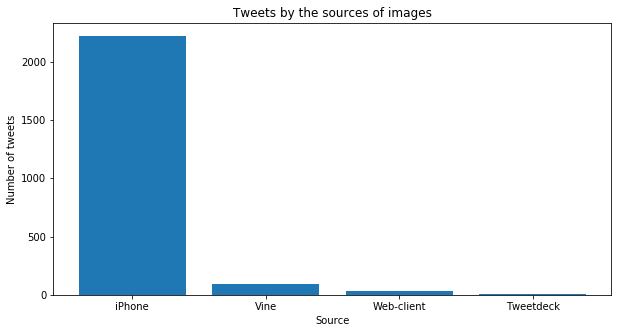

In [52]:
x = ['iPhone', 'Vine', 'Web-client', 'Tweetdeck']
y = df_archive_clean.source.value_counts()
f, ax = plt.subplots(figsize=(10,5))
plt.bar(x, y)
plt.xlabel('Source')
plt.ylabel('Number of tweets')
plt.title('Tweets by the sources of images')
plt.show();

In [53]:
# How many tweets were there every year?
df_archive_clean['tweet_id'].groupby([df_archive_clean['timestamp'].dt.year]).count()

timestamp
2015     690
2016    1183
2017     483
Name: tweet_id, dtype: int64

In [54]:
x = ['2015', '2016', '2017']
y = df_archive_clean['tweet_id'].groupby([df_archive_clean['timestamp'].dt.year]).count()

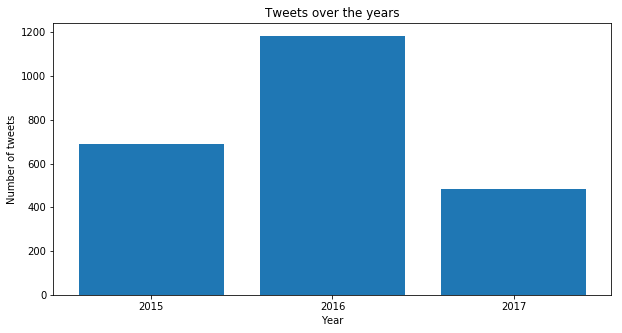

In [55]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(x, y)
plt.xlabel('Year')
plt.ylabel('Number of tweets')
plt.title('Tweets over the years')
plt.show();

In [56]:
# Among the dog classes, which was the most frequent?
df_archive_clean.dog_type.value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggofloofer      1
doggopuppo        1
Name: dog_type, dtype: int64

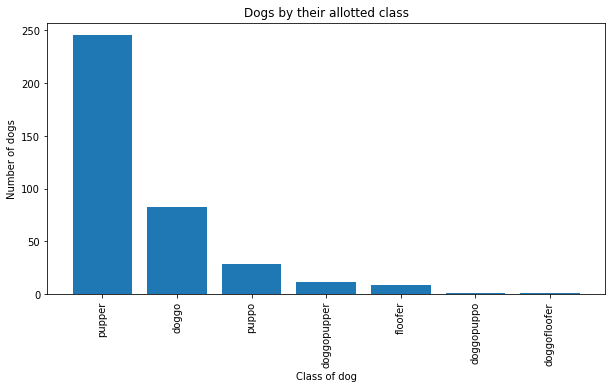

In [57]:
x = ['pupper', 'doggo', 'puppo', 'doggopupper', 'floofer', 'doggopuppo', 'doggofloofer']
y = df_archive_clean.dog_type.value_counts()
f, ax = plt.subplots(figsize=(10,5))
plt.bar(x, y)
plt.xlabel('Class of dog')
plt.ylabel('Number of dogs')
plt.title('Dogs by their allotted class')
plt.xticks(rotation='vertical')
plt.show();

In [58]:
# What were the highest favorite and retweet counts? Which dogs won those?
df_archive_clean['favorite_count'].max(), df_archive_clean['retweet_count'].max()

(140764.0, 61150.0)

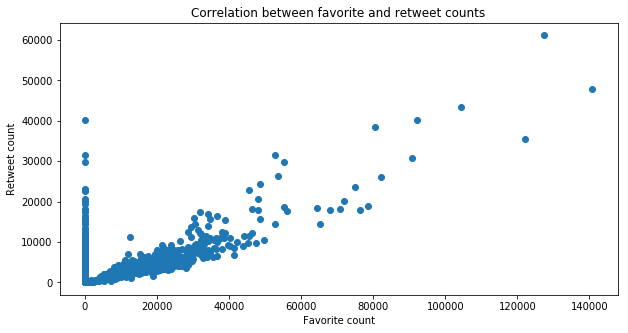

In [59]:
# Correlation between favorite and retweet counts
f, ax = plt.subplots(figsize=(10,5))
plt.scatter(df_archive_clean['favorite_count'], df_archive_clean['retweet_count'])
plt.xlabel('Favorite count')
plt.ylabel('Retweet count')
plt.title('Correlation between favorite and retweet counts')
plt.show();

In [60]:
df_archive_clean[df_archive_clean['favorite_count'] == (df_archive_clean['favorite_count'].max())]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
413,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,13,10,NaN,puppo,140764.0,47855.0,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True


In [61]:
df_archive_clean[df_archive_clean['favorite_count'] == (df_archive_clean['favorite_count'].max())].text

413    Here's a super supportive puppo participating ...
Name: text, dtype: object

In [62]:
df_archive_clean[df_archive_clean['retweet_count'] == (df_archive_clean['retweet_count'].max())]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
534,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,NaN,127370.0,61150.0,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True


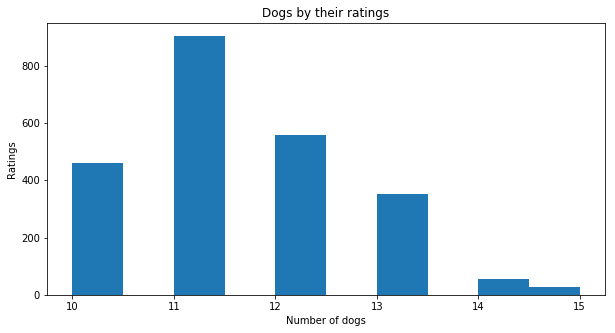

In [63]:
# How did the dog scores vary by the ratings
f, ax = plt.subplots(figsize=(10,5))
plt.hist(df_archive_clean['rating_numerator'])
plt.xlabel('Number of dogs')
plt.ylabel('Ratings')
plt.title('Dogs by their ratings')
plt.show();

In [64]:
p1_conf = df_archive_clean['p1_conf'].mean()
p2_conf = df_archive_clean['p2_conf'].mean()
p3_conf = df_archive_clean['p3_conf'].mean()
p1_err = df_archive_clean['p1_conf'].std()
p2_err = df_archive_clean['p2_conf'].std()
p3_err = df_archive_clean['p3_conf'].std()

In [65]:
# How variable were the three top predictions in their confidence levels?
x = ['p1_conf', 'p2_conf', 'p3_conf']
y = [p1_conf, p2_conf, p3_conf]
z = [p1_err, p2_err, p3_err]

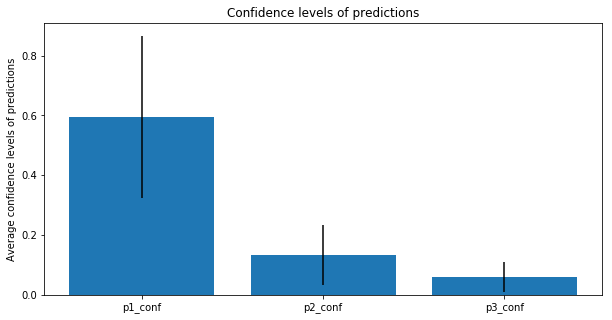

In [66]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(x, y, yerr=z)
#plt.xlabel('Predictions')
plt.ylabel('Average confidence levels of predictions')
plt.title('Confidence levels of predictions')
plt.show();

## Conclusions
After merging the three dataframes and fixing the cleanliness issues, it was seen that there were 2356 instances and 19 attributes. These were the tweet_id, timestamp, source, text, rating_numerator, rating_denominator, name, dog_type, favorite_count, retweet_count and the 9 image prediction details columns. Of the 4 sources used to render the images, iPhone, Vine, Web_client and Tweetdeck, iPhone was found to be the most frequent, with 2221 source listings. There were 690, 1183 and 483 tweets for the years 2015, 2016 and 2017 respectively. The maximum number of tweets during 2016 is expected since the tweets were collected from November 2015 to August 2017. From the information contained in the texts, the dogs were classified into dog stages, ranging from pupper to doggo to floofer, and alternative intermediate or composite stages. The pupper was seen to be the most frequent stage among the classifiable dogs (from the tweet texts) of the categories encountered viz. 'pupper', 'doggo', 'puppo', 'doggopupper', 'floofer', 'doggopuppo' and 'doggofloofer'. The highest favorite count was 140764, for an unnamed puppo, apparently a super supportive one participating in the Women's march in Toronto. The highest retweet count was 61150, for Stephan, a helpful dog predicted to be a Chihuhua with 50% confidence level. A scatter plot analysis showed that there was a strong correlation between the favorite and retweet counts for the dogs. The dogs received ratings between 11 and 15. The most frequent ratings were in the range of 11-12, numbering aroung 900. The average confidence levels for dog predictions based on their images were 60% for their first prediction, and lower for the subsequent two breed predictions. 